<a href="https://colab.research.google.com/github/abhilashasrivastava/Machine_Learning_Projects/blob/main/Customer_Life_Time_value_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
! pip install -q opendatasets

In [58]:
import opendatasets as od

In [59]:
od.download("https://www.kaggle.com/datasets/shibumohapatra/customer-life-time-value")

Skipping, found downloaded files in "./customer-life-time-value" (use force=True to force download)


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [61]:
df_train = pd.read_csv(r"/content/customer-life-time-value/train_BRCpofr.csv")

In [62]:
df_test = pd.read_csv(r"/content/customer-life-time-value/test_koRSKBP.csv")

In [63]:
df_train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [64]:
df_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [67]:
df_train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [68]:
df_train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [69]:
df_train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [70]:
df_train.corr()

<ipython-input-70-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [71]:
df_train.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [72]:
df_train = df_train.drop(["id"], axis = 'columns')

In [73]:
df_train.tail()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


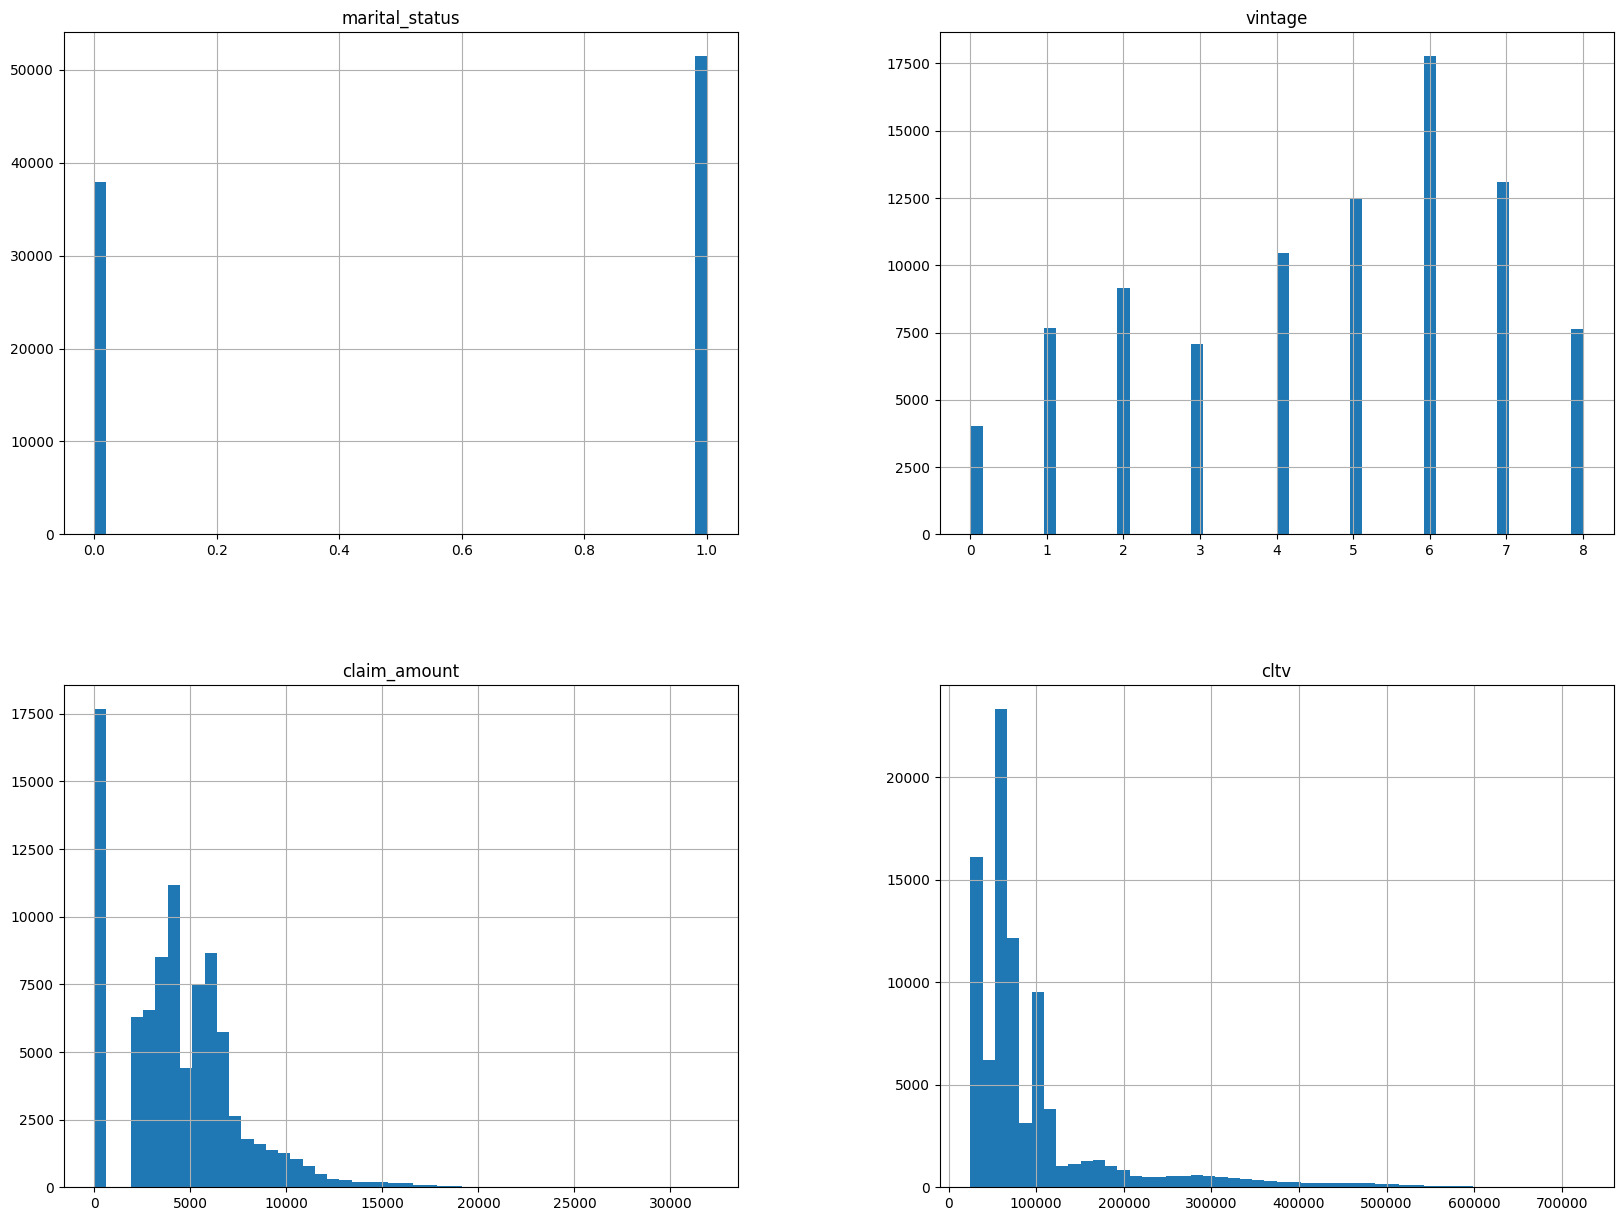

In [74]:
# Visualize all features
df_train.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-75-1e7def58aa37>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')


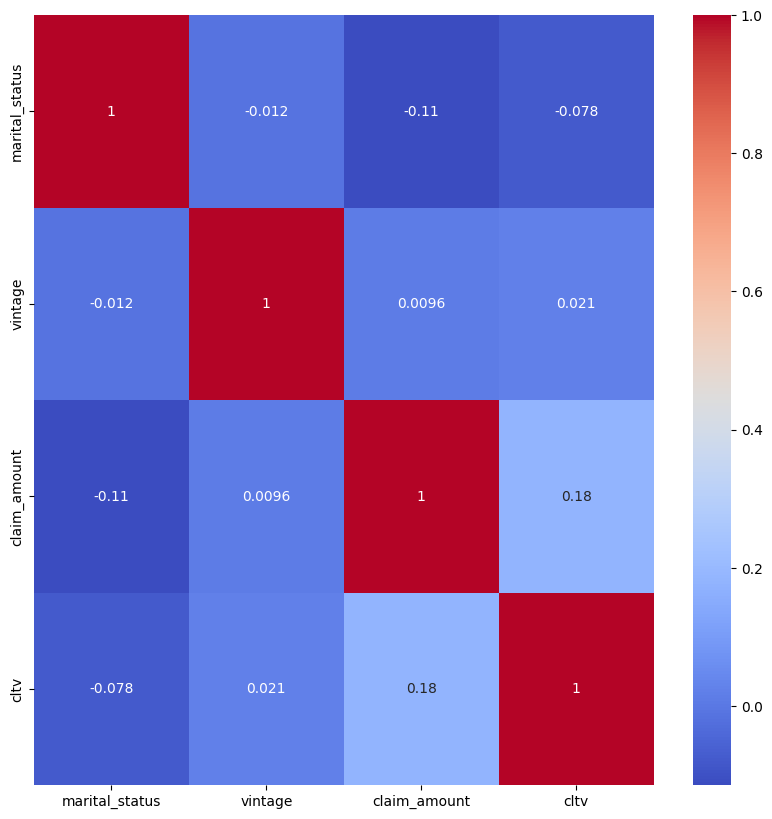

In [75]:
# Plot correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

<ipython-input-76-72d0551ddc4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


<Axes: >

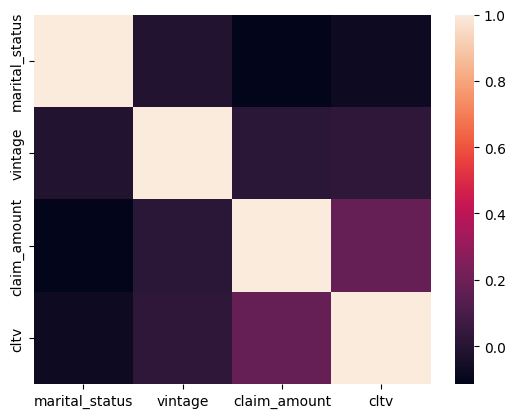

In [76]:
sns.heatmap(df_train.corr())


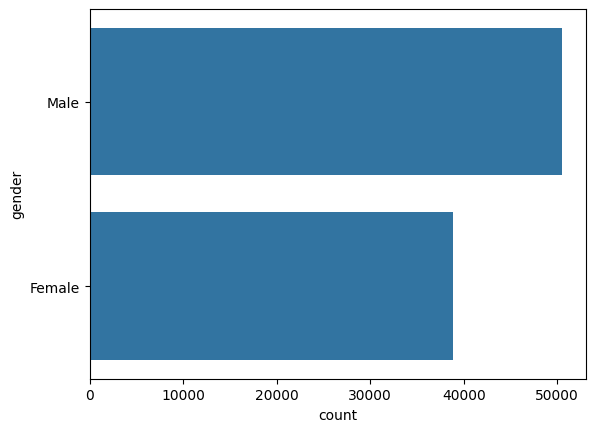

In [77]:
sns.countplot(df_train["gender"])
plt.show()

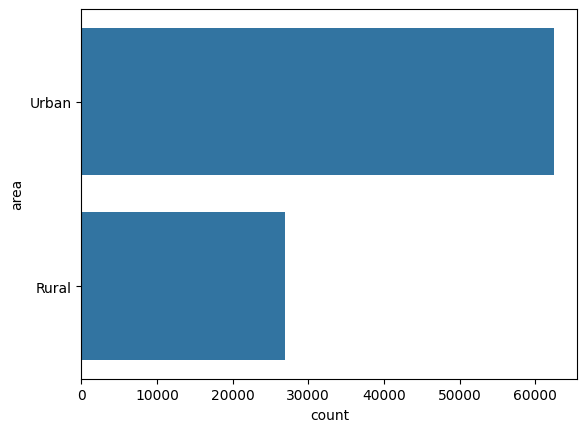

In [78]:
sns.countplot(df_train["area"])
plt.show()

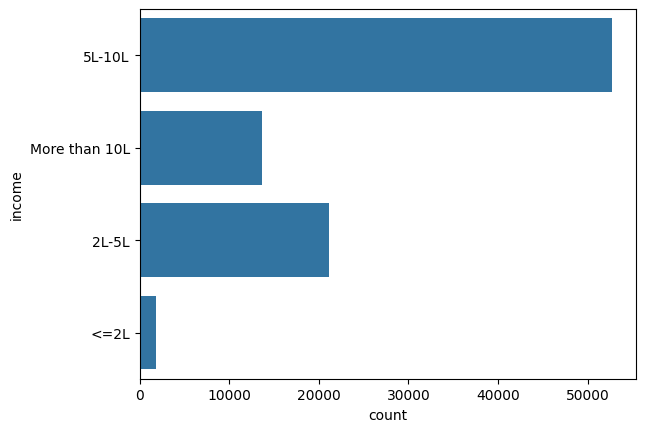

In [79]:
sns.countplot(df_train["income"])
plt.show()

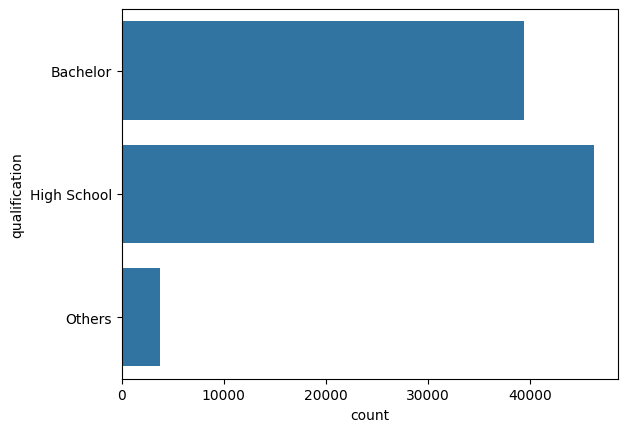

In [80]:
sns.countplot(df_train["qualification"])
plt.show()

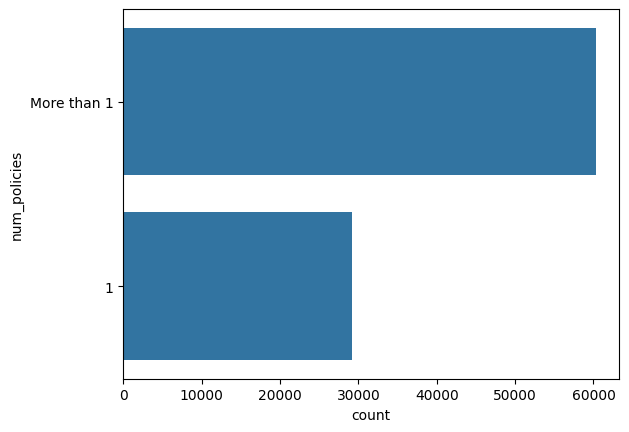

In [81]:
sns.countplot(df_train["num_policies"])
plt.show()

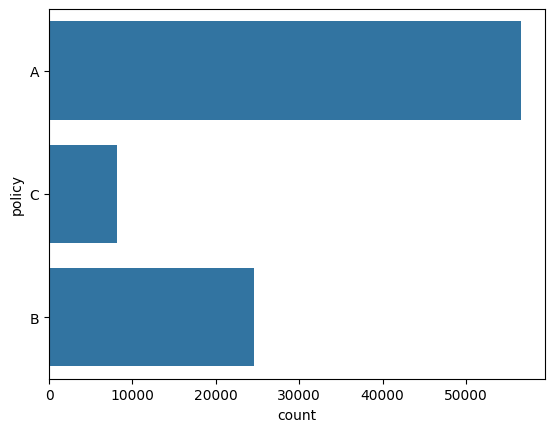

In [82]:
sns.countplot(df_train["policy"])
plt.show()

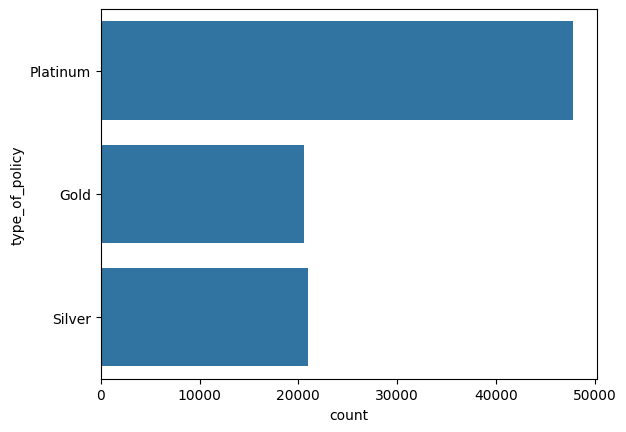

In [83]:
sns.countplot(df_train["type_of_policy"])
plt.show()

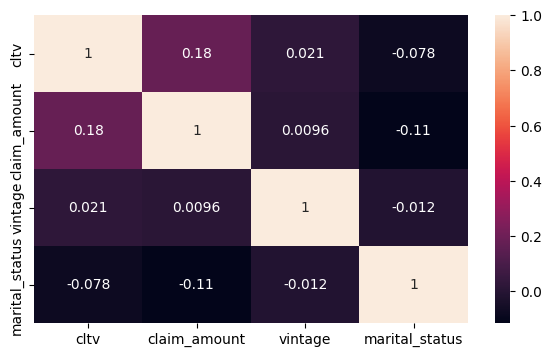

In [84]:
heatmap = df_train[['cltv', 'claim_amount', 'vintage','marital_status']]

plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

In [85]:
df_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
df_train['gender']= label_encoder.fit_transform(df_train['gender'])
df_train['gender'].unique()

array([1, 0])

In [87]:
df_train['area'] = label_encoder.fit_transform(df_train['area'])
df_train['area'].unique()

array([1, 0])

In [88]:
df_train['qualification'] = label_encoder.fit_transform(df_train['qualification'])
df_train['qualification'].unique()

array([0, 1, 2])

In [89]:
df_train['income'] = label_encoder.fit_transform(df_train['income'])
df_train['income'].unique()

array([1, 3, 0, 2])

In [90]:
df_train['num_policies'] = label_encoder.fit_transform(df_train['num_policies'])
df_train['num_policies'].unique()

array([1, 0])

In [91]:
df_train['policy'] = label_encoder.fit_transform(df_train['policy'])
df_train['policy'].unique()

array([0, 2, 1])

In [92]:
df_train['type_of_policy'] = label_encoder.fit_transform(df_train['type_of_policy'])
df_train['type_of_policy'].unique()

array([1, 0, 2])

In [93]:
df_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,0,1,1,5,5790,1,0,1,64308
1,1,0,1,1,0,8,5080,1,0,1,515400
2,1,1,0,1,1,8,2599,1,0,1,64212
3,0,0,1,1,0,7,0,1,0,1,97920
4,1,1,1,3,1,6,3508,1,0,0,59736


In [94]:
X = df_train.drop('cltv', axis = 1)

In [95]:
X.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,1,0,1,1,5,5790,1,0,1
1,1,0,1,1,0,8,5080,1,0,1
2,1,1,0,1,1,8,2599,1,0,1
3,0,0,1,1,0,7,0,1,0,1
4,1,1,1,3,1,6,3508,1,0,0


In [96]:
y = df_train['cltv']

In [97]:
y.head()

0     64308
1    515400
2     64212
3     97920
4     59736
Name: cltv, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [99]:
df_train.shape

(89392, 11)

In [100]:
X_train.shape

(71513, 10)

In [101]:
y_train.shape

(71513,)

In [102]:
X_test.shape

(17879, 10)

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [104]:
model.score(X_test,y_test)

0.14990201550909288

In [105]:
X_test

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
43603,1,1,0,1,0,6,5382,1,0,0
37348,0,0,1,1,1,8,2800,0,0,1
37794,1,1,1,1,1,4,5419,1,0,1
66114,0,1,1,0,0,1,5259,1,0,2
4027,0,1,1,1,1,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
82232,0,1,1,0,1,5,3504,1,0,1
16543,1,1,1,0,1,4,10708,1,0,1
55127,1,1,1,1,1,5,6601,0,0,1
11446,1,1,1,1,0,2,3917,1,0,0


In [106]:
y_pred=model.predict(X_test)
y_pred

array([132245.65129866,  39351.52472553, 121847.90328253, ...,
        60442.57875543, 125920.58562544,  29565.70308861])

In [107]:
y_pred

array([132245.65129866,  39351.52472553, 121847.90328253, ...,
        60442.57875543, 125920.58562544,  29565.70308861])

In [108]:
mean_absolute_error(y_pred,y_test)


51093.892528748554